<a href="https://colab.research.google.com/github/Amaracci/Strikers-Performance/blob/main/Strikers_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm

In [63]:
data = pd.read_excel(r'/content/Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [64]:
#Checking for missing data
data.isnull().sum()

,0
Striker_ID,0
Nationality,0
Footedness,0
Marital Status,0
Goals Scored,0
Assists,0
Shots on Target,0
Shot Accuracy,0
Conversion Rate,0
Dribbling Success,0


In [65]:
#Filling Missing numeric data with Median
numeric_data = data.select_dtypes(include=[np.number])
median_values = numeric_data.median()

data = data.fillna(median_values)

In [66]:
#Checking for correct data types
data.dtypes

,0
Striker_ID,int64
Nationality,object
Footedness,object
Marital Status,object
Goals Scored,float64
Assists,float64
Shots on Target,float64
Shot Accuracy,float64
Conversion Rate,float64
Dribbling Success,float64


In [67]:
round(data.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,15.04,8.10,25.76,0.60,0.20,0.70,69.79,59.81,19.53,39.95,6.93,0.74,0.80,7.01,8.06
std,144.48,4.90,2.93,7.07,0.10,0.05,0.10,10.34,10.17,4.96,9.92,1.94,0.10,0.10,2.10,2.07
min,1.00,0.00,0.00,4.73,0.31,0.05,0.40,40.71,35.07,4.96,8.23,2.23,0.46,0.53,0.56,0.62
25%,125.75,11.50,6.21,20.78,0.54,0.17,0.64,62.70,52.43,16.40,33.46,5.69,0.68,0.72,5.66,6.62
50%,250.50,15.06,8.09,25.84,0.60,0.20,0.70,69.62,60.08,19.74,39.98,6.91,0.75,0.80,6.99,8.02
75%,375.25,18.18,9.95,30.28,0.67,0.23,0.76,76.93,66.03,22.86,46.69,8.13,0.81,0.87,8.43,9.45
max,500.00,34.26,15.90,43.21,0.92,0.36,1.00,98.68,92.43,34.07,71.13,12.87,1.00,1.00,13.24,13.73


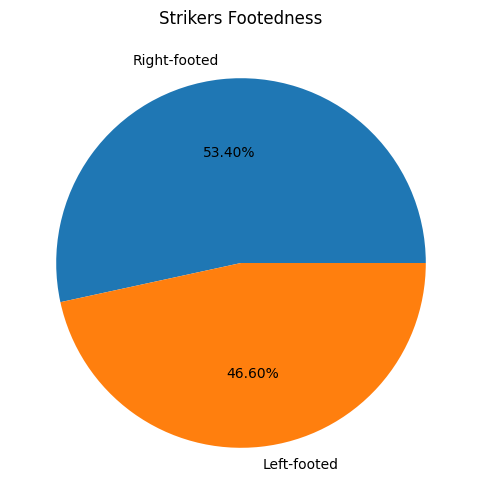

In [68]:
# Visualizig the percentage analysis on the variable Footedness
footedness_count = data['Footedness'].value_counts(normalize=True) * 100
footedness_count

#Plotting Pie chart for Footedness
plt.figure(figsize = (12,6))
footedness_count.plot(kind = 'pie', autopct = '%1.2f%%')
plt.title('Strikers Footedness')
plt.ylabel('')
plt.show()

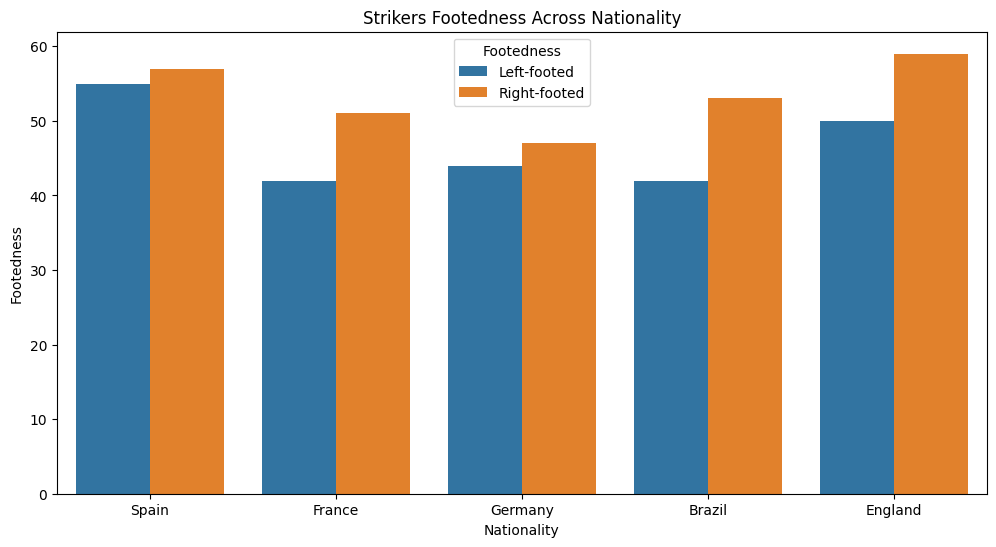

In [69]:
#Visualizing the distribution of players' footedness across different nationalities in a countplot
plt.figure(figsize = (12,6))
sns.countplot(x = data['Nationality'], hue = data['Footedness'])
plt.title('Strikers Footedness Across Nationality')
plt.xlabel('Nationality')
plt.ylabel('Footedness')
plt.show()

In [70]:
#Statistical Analysis
#Highest Average Goals by Nationality
avg_goals_nationality = data.groupby('Nationality')['Goals Scored'].mean().sort_values(ascending = False)
avg_goals_nationality


,Goals Scored
Nationality,
Brazil,15.804927
Spain,15.196491
France,14.900827
Germany,14.860242
England,14.465756


In [71]:
data['Nationality'].unique()

array(['Spain', 'France', 'Germany', 'Brazil', 'England'], dtype=object)

In [72]:
#Average conversion rate for players based on their footedness
Avg_cr_by_footedness = data.groupby('Footedness')['Conversion Rate'].mean()
Avg_cr_by_footedness

,Conversion Rate
Footedness,
Left-footed,0.198086
Right-footed,0.200592


In [73]:
#Performing a One-Way Anova Test
#Finding any significant difference in consistency rates among strikers from various nationalities

Spain = data.query('Nationality == "Spain"')['Consistency']
France = data.query('Nationality == "France"')['Consistency']
Germany = data.query('Nationality == "Germany"')['Consistency']
Brazil = data.query('Nationality == "Brazil"')['Consistency']
England = data.query('Nationality == "England"')['Consistency']

t_stat, p_value = stats.f_oneway(Spain, France, Germany, Brazil, England)
print(f'P_Value :', p_value)

alpha = 0.05
if p_value < 0.05:
  print('Reject Null Hypothesis. There is significant difference in consistency rates among strikers from various nationalities')
else:
  print('Fail to Reject Null Hypothesis. There is no significant difference in consistency rates among strikers from various nationalities')

data

P_Value : 0.19278675901599154
Fail to Reject Null Hypothesis. There is no significant difference in consistency rates among strikers from various nationalities


,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,England,Left-footed,Yes,17.694550,7.156699,39.042650,0.707015,0.240660,0.707748,89.351540,60.284576,28.386885,39.510350,4.448635,0.767147,0.770213,5.999478,12.419711
496,497,Germany,Right-footed,Yes,9.813769,13.393060,39.430525,0.597348,0.186052,0.725775,78.155010,39.221882,15.974141,47.114106,6.742907,0.865265,0.876903,5.967767,8.653989
497,498,England,Left-footed,Yes,14.048307,9.922529,33.458564,0.511813,0.186012,0.575824,69.519115,56.797022,25.384241,71.129102,5.696650,0.628260,0.747261,11.249112,6.329751
498,499,England,Right-footed,Yes,10.621909,6.286463,32.168438,0.583693,0.239519,0.733418,68.168495,76.433782,9.151613,48.080362,2.611235,0.796795,0.799489,1.452370,11.305826


In [74]:
#Performing Pearson Correlation Test
#Finding any significant correlation between strikers' Hold-up play and consistency rate
hold_up_play = data['Hold-up Play']
consistency_rate = data['Consistency']

corr, p_value = pearsonr(hold_up_play, consistency_rate)
print(f'Correlation :', corr)
print(f'P_value :', p_value)

alpha = 0.05
if p_value < 0.05:
  print("Reject Null Hypothesis. There is significant correlation between striker's hold-up play and consistency rates")
else:
  print("Fail to Reject Null Hypothesis. There is no significant correlation between striker's hold-up play and consistency rates")


Correlation : 0.14504436542869958
P_value : 0.001144397241805525
Reject Null Hypothesis. There is significant correlation between striker's hold-up play and consistency rates


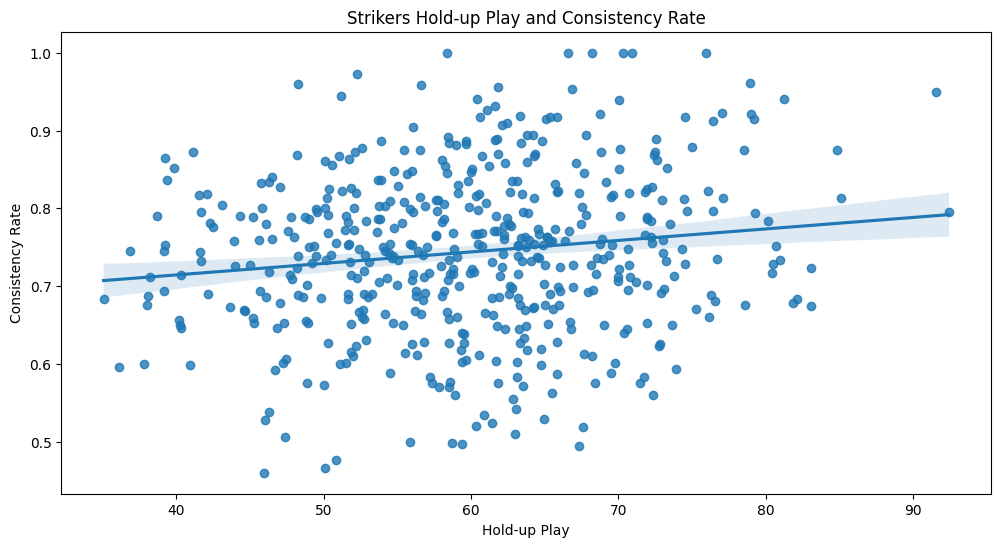

In [75]:
#Viewing the Linearity Between Hold_Up Play and Consistency Rate)
plt.figure(figsize = (12,6))
sns.regplot(x = hold_up_play, y = consistency_rate)
plt.title('Strikers Hold-up Play and Consistency Rate')
plt.xlabel('Hold-up Play')
plt.ylabel('Consistency Rate')
plt.show()

In [76]:
#Performing Linear Regression
#Checking if strikers' hold-up play significantly influences their consistency rate

x = hold_up_play
y = consistency_rate

x_and_constant = sm.add_constant(x)
model= sm.OLS(y, x_and_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     10.70
Date:                Tue, 11 Feb 2025   Prob (F-statistic):            0.00114
Time:                        13:45:46   Log-Likelihood:                 429.86
No. Observations:                 500   AIC:                            -855.7
Df Residuals:                     498   BIC:                            -847.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6552      0.027     23.903   

In [77]:
#Feature Generation - Total Contribution
data['Total Contribution'] = data[['Goals Scored', 'Assists', 'Shots on Target',
                                   'Dribbling Success', 'Aerial Duels Won', 'Defensive Contribution',
                                   'Big Game Performance', 'Consistency']].sum(axis = 1)
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,116.882195
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,113.521571
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,96.556476
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,126.859035
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,110.548681


In [78]:
#Label encoding Footedness and Marital Status
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Footedness'] = encoder.fit_transform(data['Footedness'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])

data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution
0,1,Spain,0,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388,116.882195
1,2,France,0,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689,113.521571
2,3,Germany,0,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835,96.556476
3,4,France,1,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653,126.859035
4,5,France,0,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333,110.548681


In [79]:
#Creating dummies for Nationality
dummies = pd.get_dummies(data['Nationality'])
dummies = dummies.astype(int)
processed_data = pd.concat([data, dummies], axis = 1)  #Named the data as processed_data to keep the originality of the original data
processed_data = processed_data.drop(['Nationality'], axis = 1)
processed_data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution,Brazil,England,France,Germany,Spain
0,1,0,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,...,0.820314,0.922727,8.570370,11.451388,116.882195,0,0,0,0,1
1,2,0,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,...,0.803321,0.678984,3.444638,8.243689,113.521571,0,0,1,0,0
2,3,0,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,...,0.766540,0.843858,8.429491,9.506835,96.556476,0,0,0,1,0
3,4,1,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,...,0.611798,0.662997,6.532552,8.199653,126.859035,0,0,1,0,0
4,5,0,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,...,0.701638,0.906538,8.414915,6.665333,110.548681,0,0,1,0,0


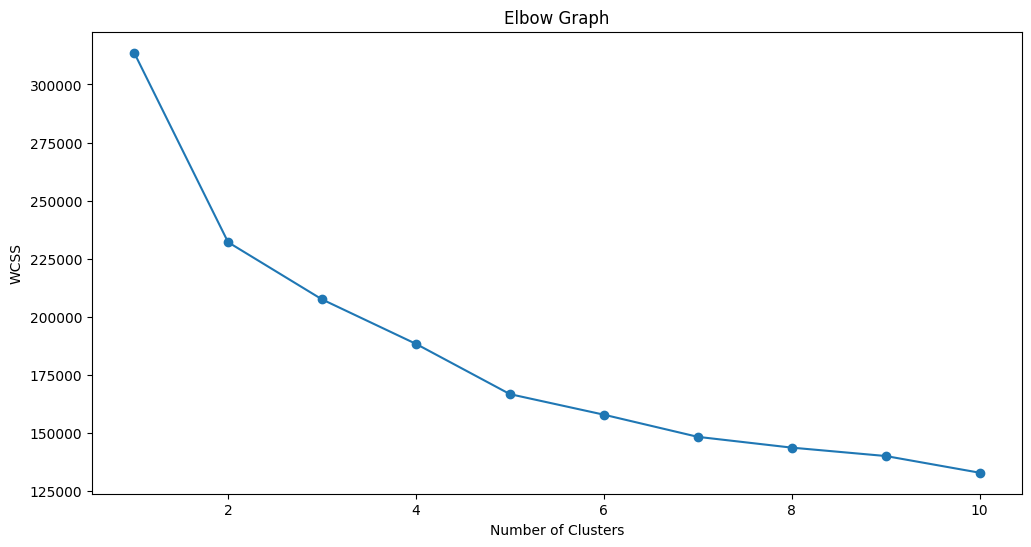

In [81]:
#Importing the Library for Perfoming KMeans Clustering
from sklearn.cluster import KMeans

#CAlculating the Within Cluster Sum of Squares For finding the Optimal number of Clusters
x = processed_data.drop(['Striker_ID'], axis = 1)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(x)
  wcss_values = kmeans.inertia_
  wcss.append(wcss_values)


#Plotting the Elbow Graph
plt.figure(figsize = (12,6))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
#Building the KMeans Cluster with Cluster of 2
kmeans = KMeans(n_clusters=2, random_state = 42)
kmeans.fit(x)

labels = kmeans.labels_

#Adding the labels into the data
processed_data['Strikers_Type'] = labels
processed_data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution,Brazil,England,France,Germany,Spain,Strikers_Type
0,1,0,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,...,0.922727,8.570370,11.451388,116.882195,0,0,0,0,1,0
1,2,0,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,...,0.678984,3.444638,8.243689,113.521571,0,0,1,0,0,0
2,3,0,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,...,0.843858,8.429491,9.506835,96.556476,0,0,0,1,0,0
3,4,1,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,...,0.662997,6.532552,8.199653,126.859035,0,0,1,0,0,1
4,5,0,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,...,0.906538,8.414915,6.665333,110.548681,0,0,1,0,0,0


In [87]:
#Grouping the labels by Total Contribution of the players to Understand the labels
processed_data.groupby('Strikers_Type')['Total Contribution'].mean()

#Naming the Labels
mapping = {0 : 'Regular Strikers', 1 : 'Best Strikers'}
processed_data['Strikers_Type'] = processed_data['Strikers_Type'].map(mapping)
processed_data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total Contribution,Brazil,England,France,Germany,Spain,Strikers_Type
0,1,0,0,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,...,0.922727,8.570370,11.451388,116.882195,0,0,0,0,1,Regular Strikers
1,2,0,1,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,...,0.678984,3.444638,8.243689,113.521571,0,0,1,0,0,Regular Strikers
2,3,0,0,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,...,0.843858,8.429491,9.506835,96.556476,0,0,0,1,0,Regular Strikers
3,4,1,0,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,...,0.662997,6.532552,8.199653,126.859035,0,0,1,0,0,Best Strikers
4,5,0,1,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,...,0.906538,8.414915,6.665333,110.548681,0,0,1,0,0,Regular Strikers


In [90]:
#Selecting the Features and Target for Machine Learning
x = processed_data.drop(['Striker_ID', 'Strikers_Type'], axis = 1)
y = processed_data['Strikers_Type']

#Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


#Splitting Data for Training and Testing the Models
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

Accuracy : 96.0 %


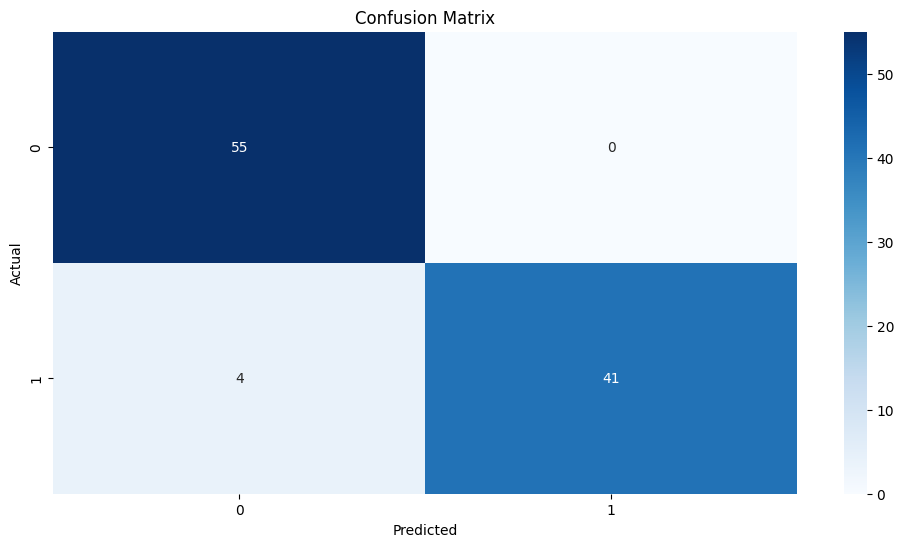

In [94]:
#Building a logistic regression machine learning model to predict strikers type.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#Checking for Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy :', accuracy*100,'%')


#Creating the confusion matrix and visualizing it
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()